In [1]:
#Importing Libraries
import saha_mult #Class used to calculate abundances 
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as sc
from time import process_time #Useful for finding calculation times
import pickle #for saving data in lists to txt files.


import importlib 
importlib.reload(saha_mult) #This command ensures that any changes made to saha_mult class are reflected in this notebook

<module 'saha_mult' from 'C:\\Users\\prana\\Documents\\Research\\R-process_Mergers\\Abundance_Calculations\\Fixing_Cutoff\\saha_mult.py'>

In [4]:
#Opening and Reading in Data Files
with open("All_Elements.txt", "rb") as fp:   # Unpickling
      YI_all_adjusted = pickle.load(fp)

'''with open("Lanthanides.txt", "rb") as fp:   # Unpickling
      YI_lanth = pickle.load(fp)
        
with open("Lanthanides_Actinides.txt", "rb") as fp:   # Unpickling
      YI_lanth_act = pickle.load(fp)'''

'with open("Lanthanides.txt", "rb") as fp:   # Unpickling\n      YI_lanth = pickle.load(fp)\n        \nwith open("Lanthanides_Actinides.txt", "rb") as fp:   # Unpickling\n      YI_lanth_act = pickle.load(fp)'

In [5]:
#Just setting up time and temperature values here
hf = h5py.File("SkyNet_r-process.h5")

#This cell is simply for temperature, and since it does not change no matter the elements used, I do not use a function
#At some point, I will have to find a way to find the places to calculate the indices to use to find slope for other hdf5s
temperature = hf["Temperature"]
time = hf["Time"]
mod_temp = []
full_temp = []

linear = np.polyfit(np.log10(np.array(time[900:1700])),np.log10(np.array(temperature[900:1700])),1)
m = linear[0]

for i in range(0,len(temperature)):
    if i < 1700:
        mod_temp.append(np.log10(temperature[i]))
        full_temp.append(temperature[i])
    else:
        del_t = m*(np.log10(time[i]) - np.log10(time[i-1]))
        mod_temp.append(mod_temp[i-1]+del_t)
        full_temp.append(10**mod_temp[i])
        
abundance = hf["Y"]
charge = hf["Z"]
density = hf["Density"]
kbEvpGK = 8.617e-5*1e9

This is for element:  1


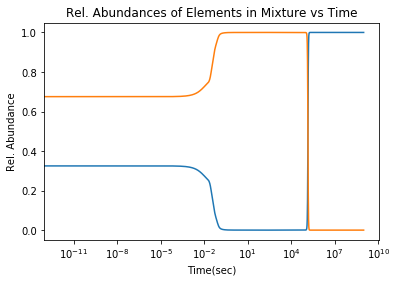

This is for element:  2


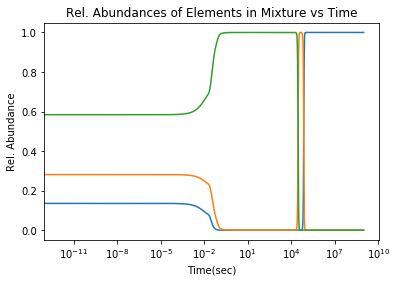

This is for element:  3


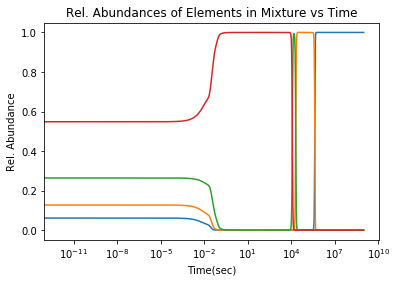

This is for element:  4


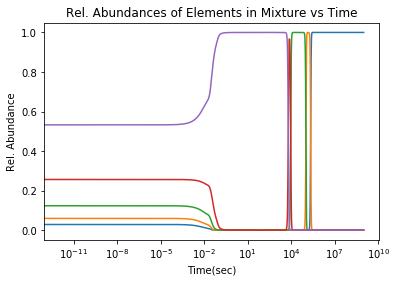

This is for element:  5


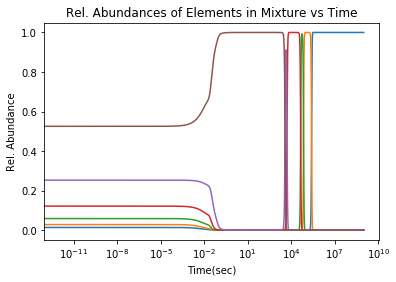

This is for element:  6


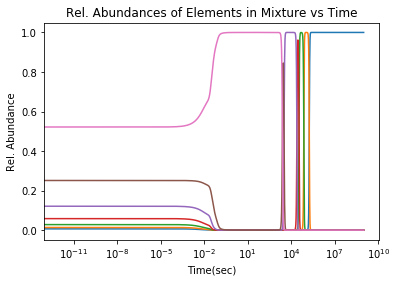

This is for element:  7


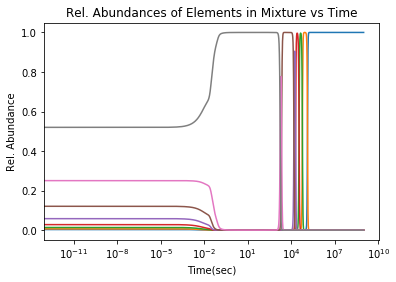

This is for element:  8


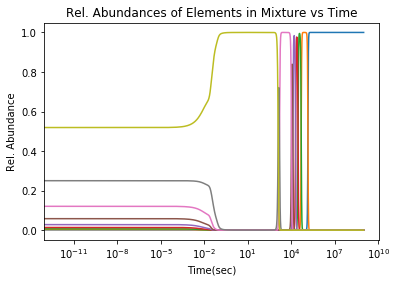

This is for element:  9


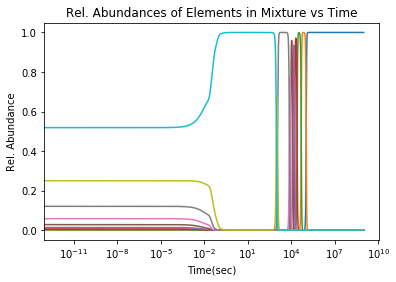

This is for element:  10


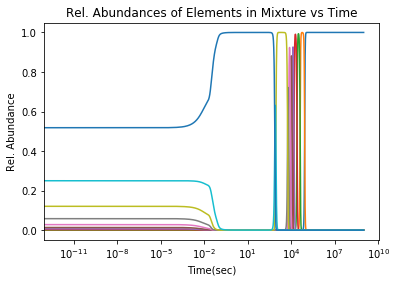

This is for element:  11


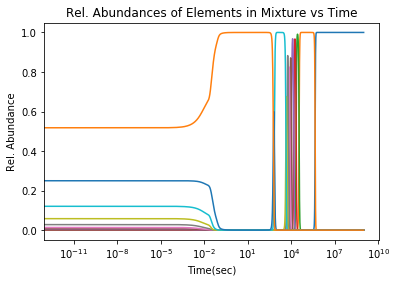

This is for element:  12


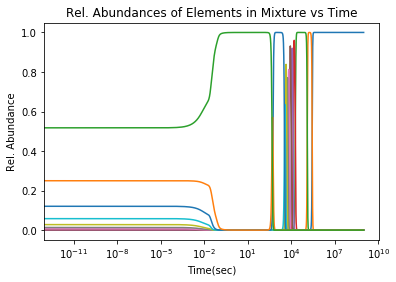

This is for element:  13


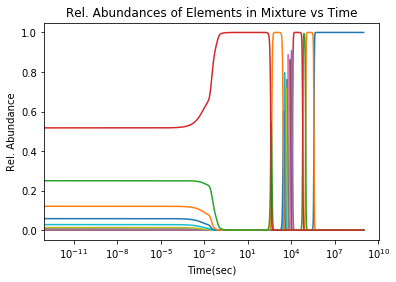

This is for element:  14


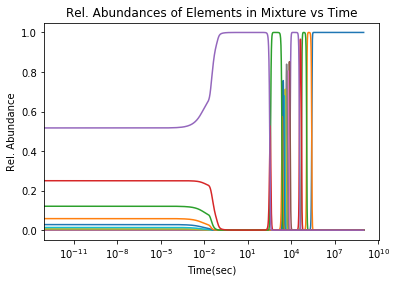

This is for element:  15


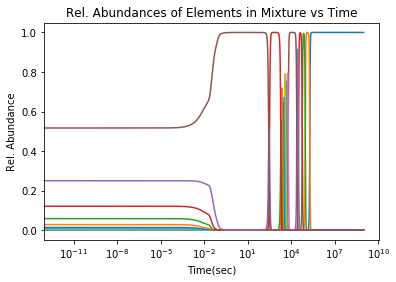

This is for element:  16


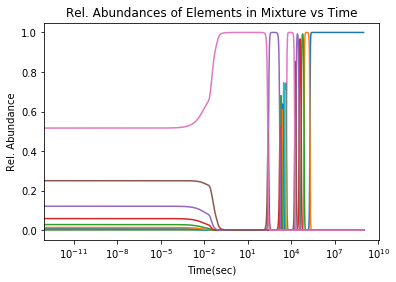

This is for element:  17


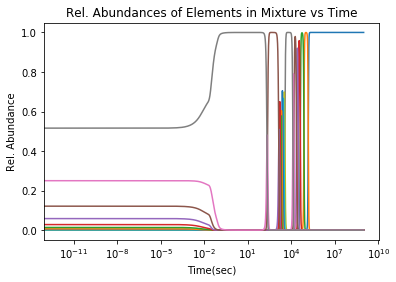

This is for element:  18


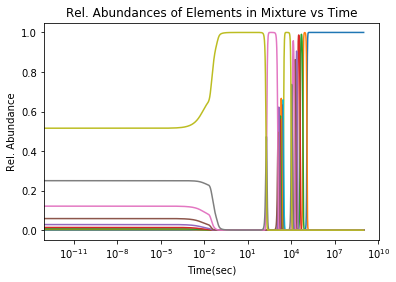

This is for element:  19


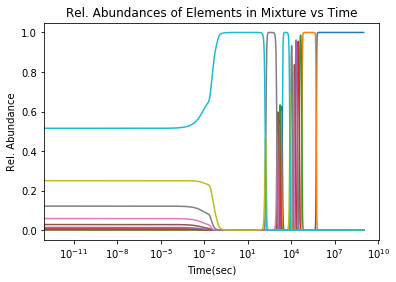

This is for element:  20


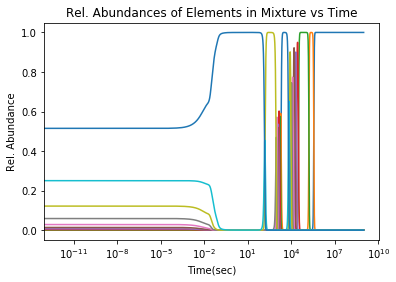

This is for element:  21


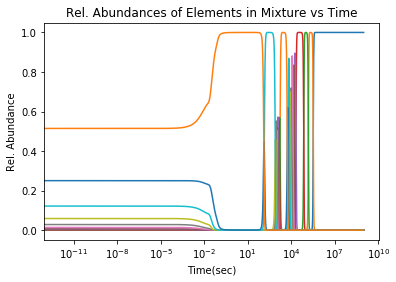

This is for element:  22


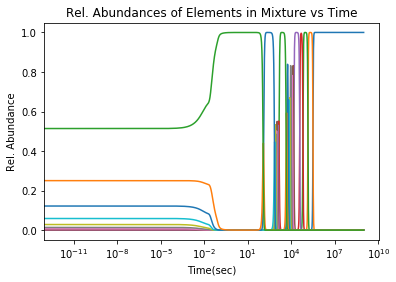

This is for element:  23


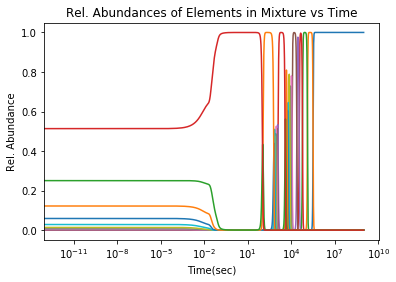

This is for element:  24


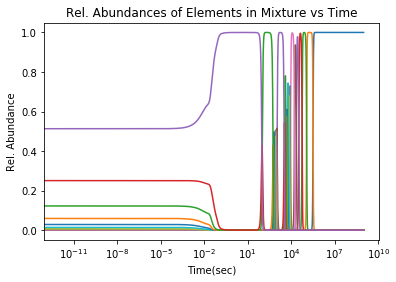

This is for element:  25


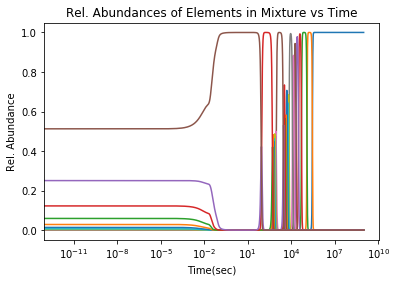

This is for element:  26


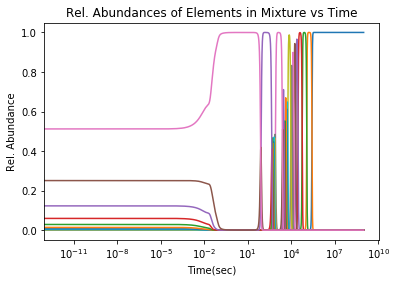

This is for element:  27


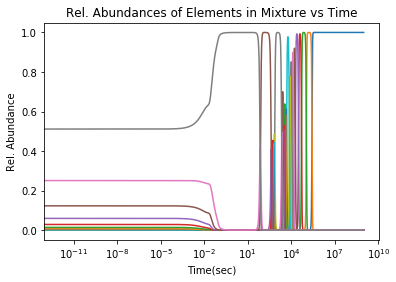

This is for element:  28


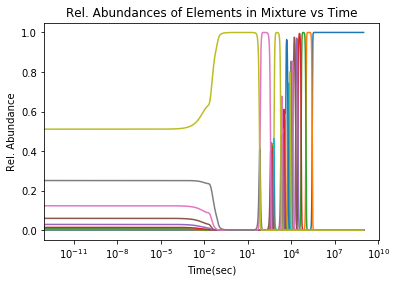

This is for element:  29


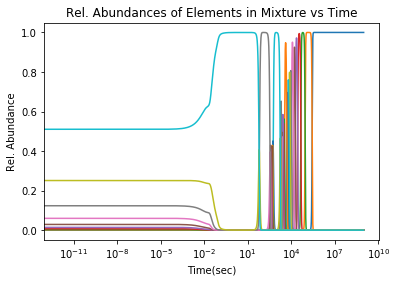

This is for element:  30


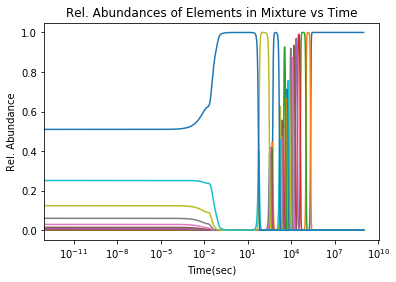

This is for element:  31


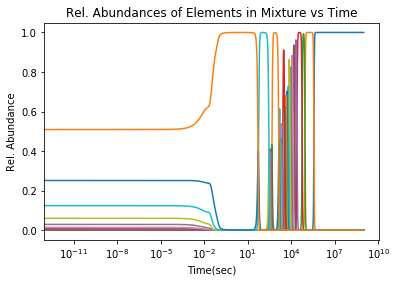

This is for element:  32


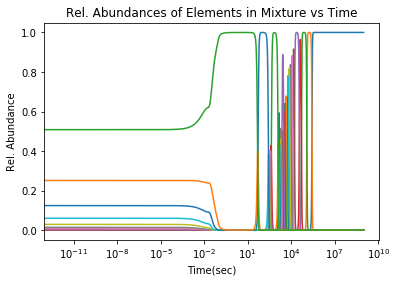

This is for element:  33


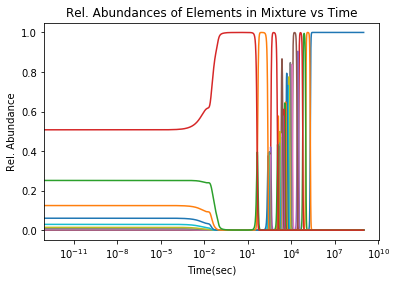

This is for element:  34


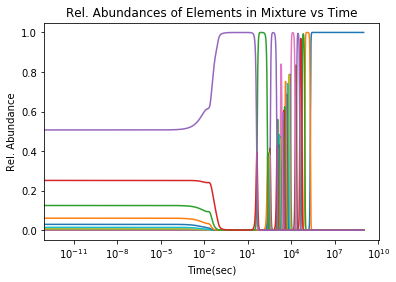

This is for element:  35


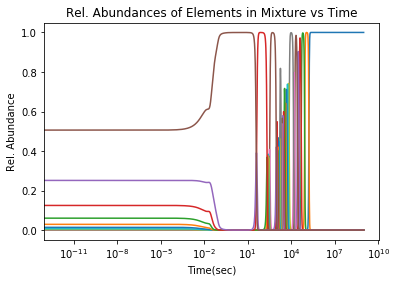

This is for element:  36


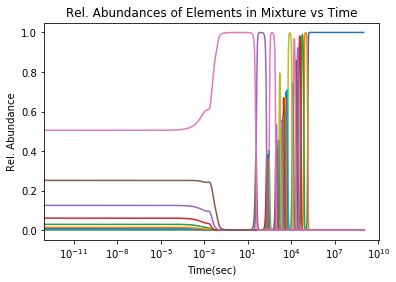

This is for element:  37


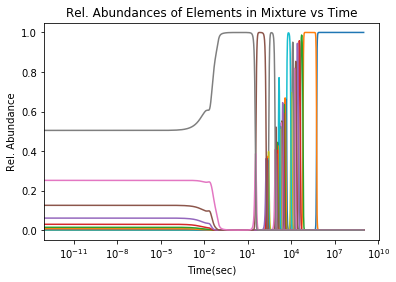

This is for element:  38


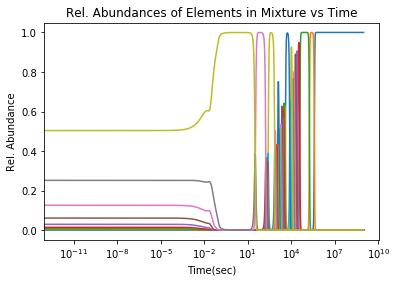

This is for element:  39


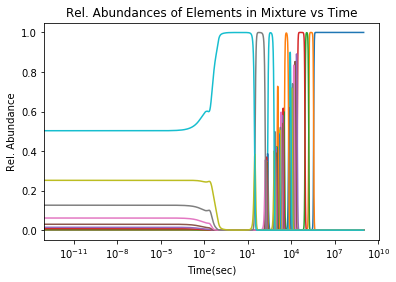

This is for element:  40


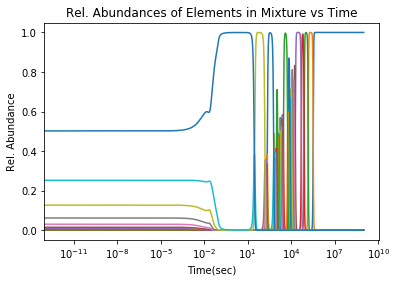

This is for element:  41


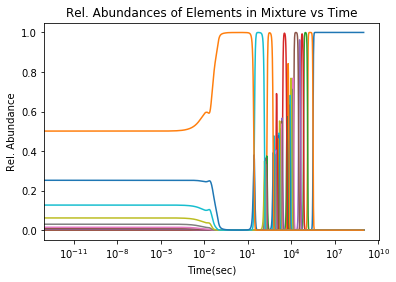

This is for element:  42


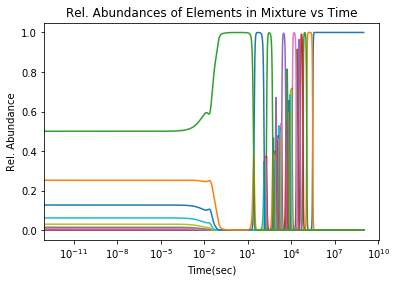

This is for element:  43


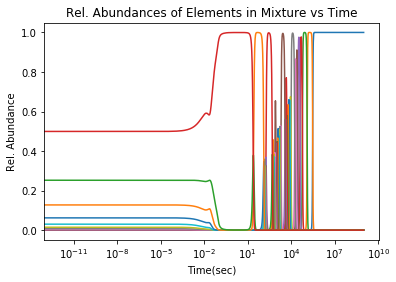

This is for element:  44


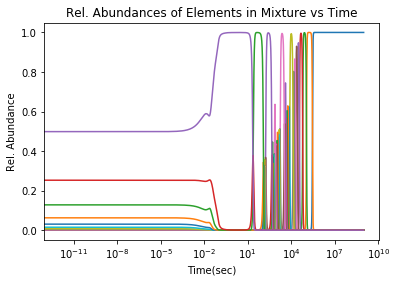

This is for element:  45


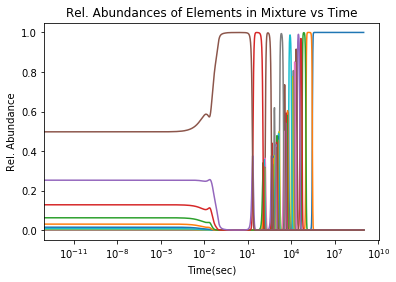

This is for element:  46


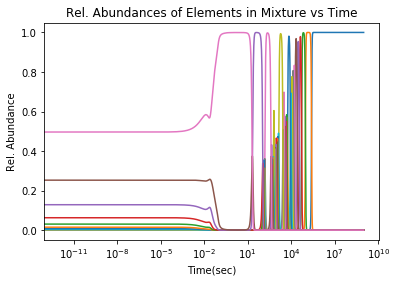

This is for element:  47


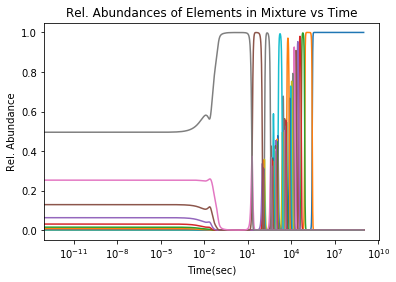

This is for element:  48


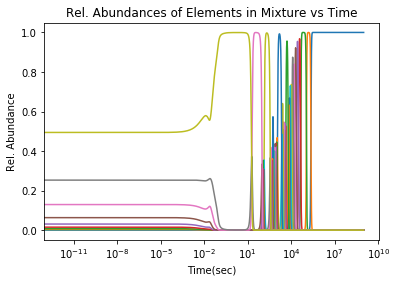

This is for element:  49


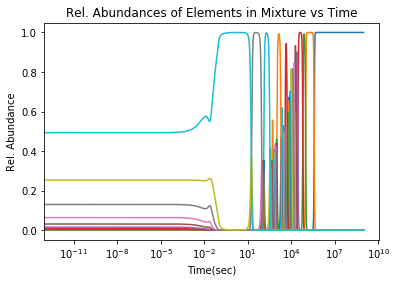

This is for element:  50


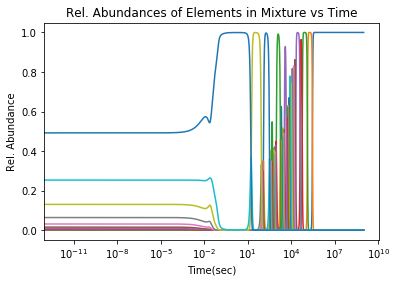

This is for element:  51


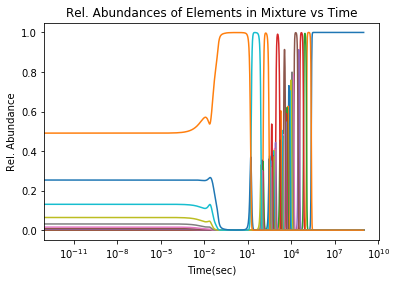

This is for element:  52


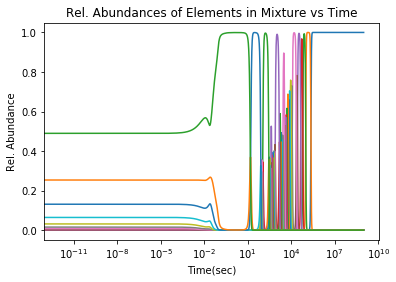

This is for element:  53


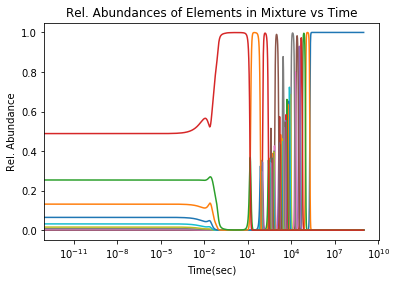

This is for element:  54


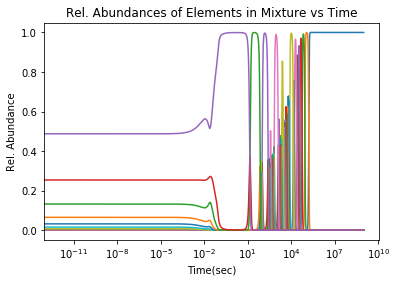

This is for element:  55


C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


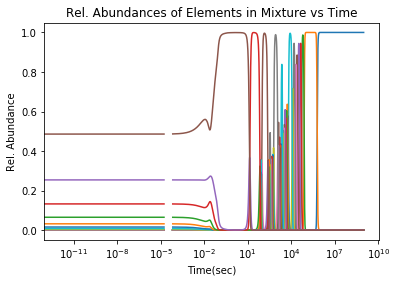

This is for element:  56


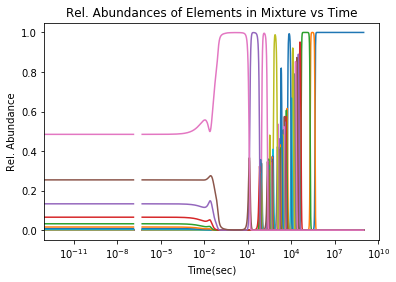

This is for element:  57


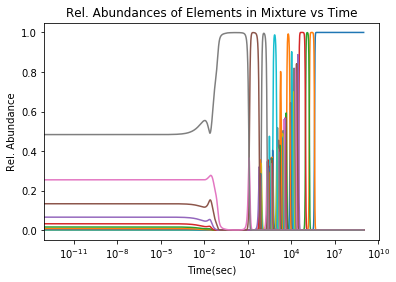

This is for element:  58


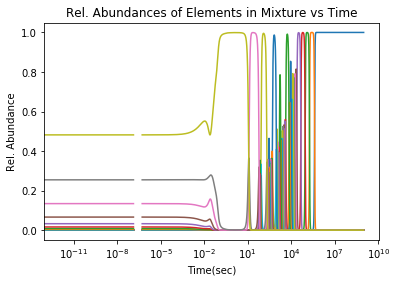

This is for element:  59


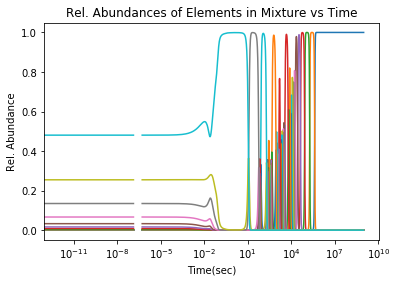

This is for element:  60


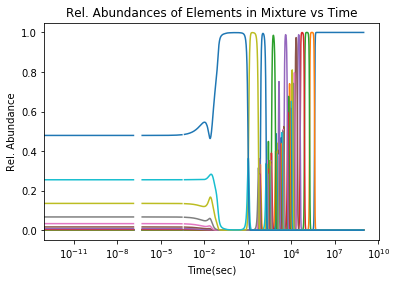

This is for element:  61


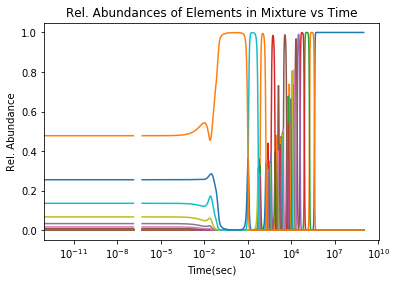

This is for element:  62


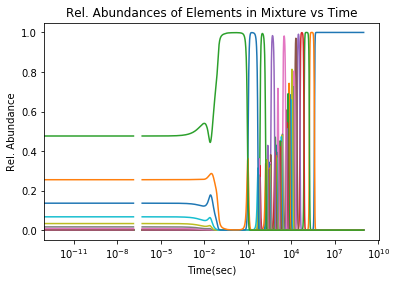

This is for element:  63


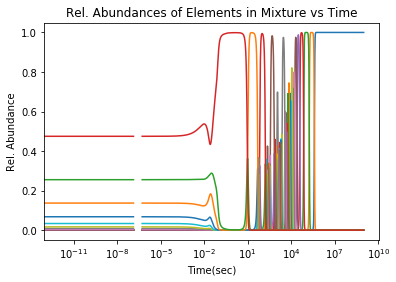

This is for element:  64


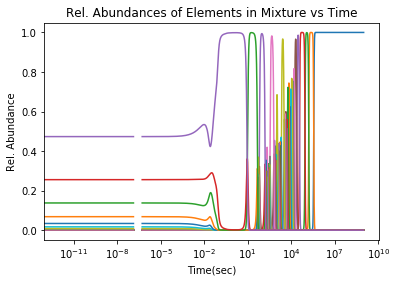

This is for element:  65


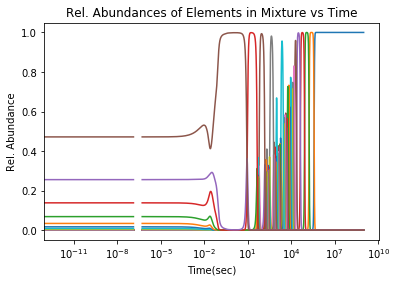

This is for element:  66


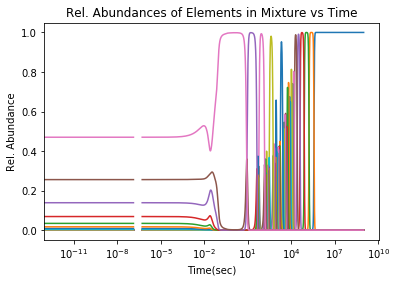

This is for element:  67


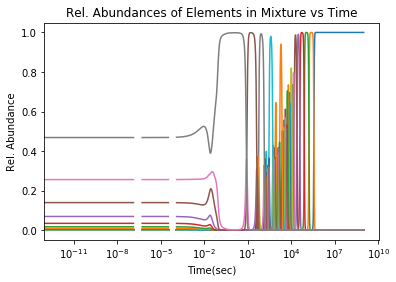

This is for element:  68


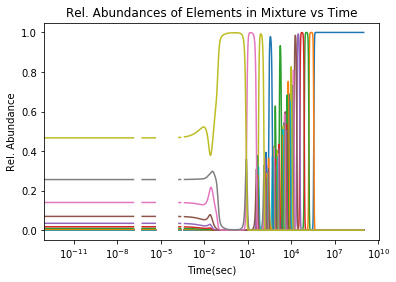

This is for element:  69


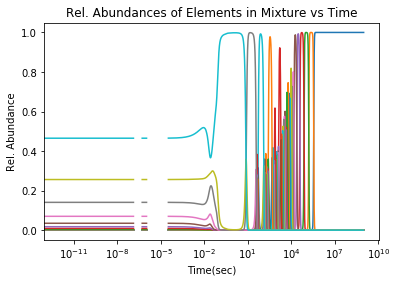

This is for element:  70


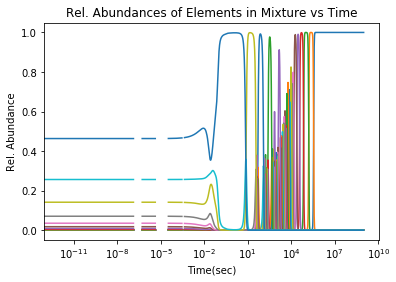

This is for element:  71


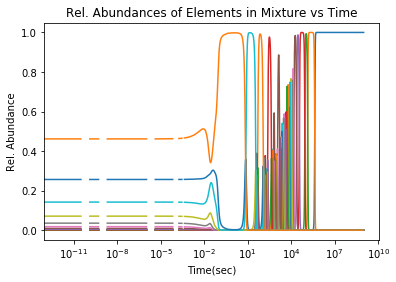

This is for element:  72


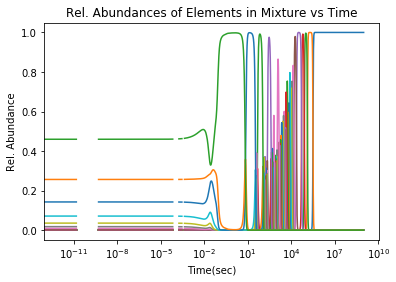

This is for element:  73


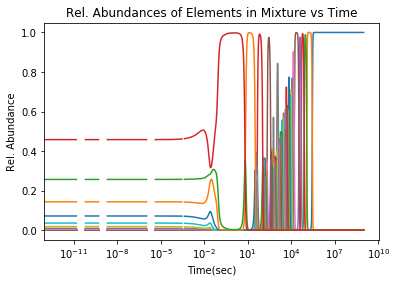

This is for element:  74


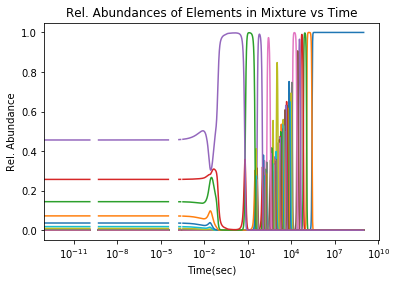

This is for element:  75


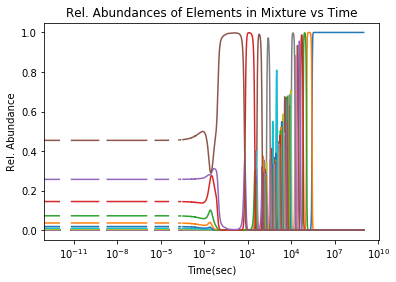

This is for element:  76


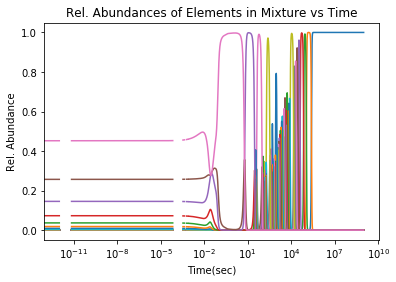

This is for element:  77


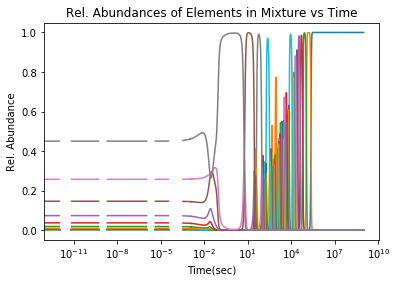

This is for element:  78


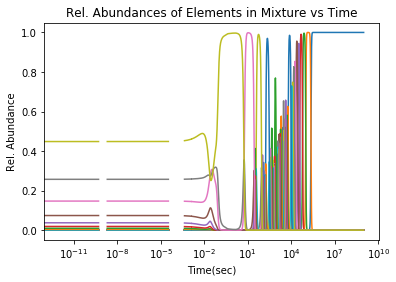

This is for element:  79


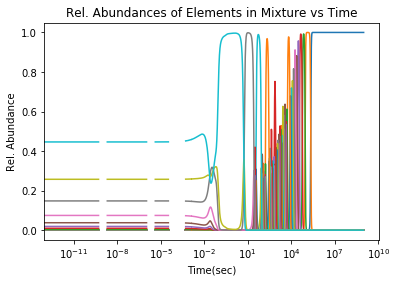

This is for element:  80


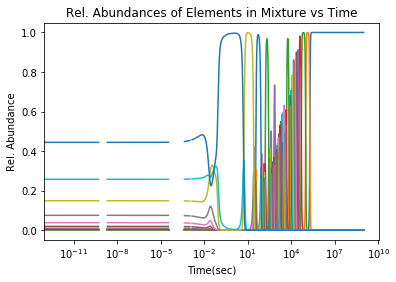

This is for element:  81


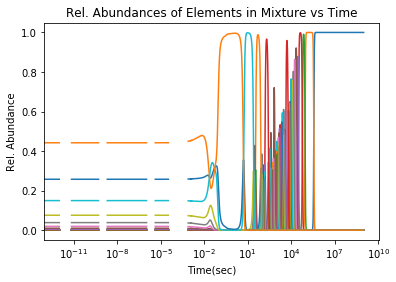

This is for element:  82


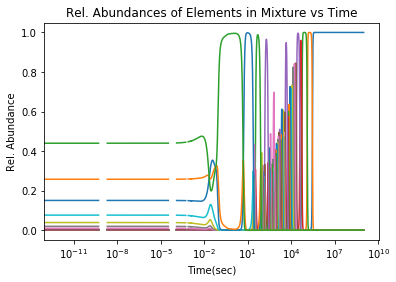

This is for element:  83


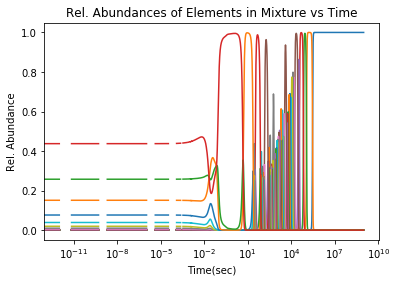

This is for element:  84


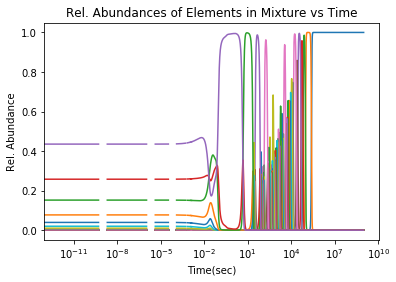

This is for element:  85


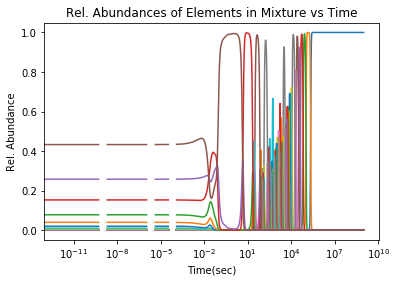

This is for element:  86


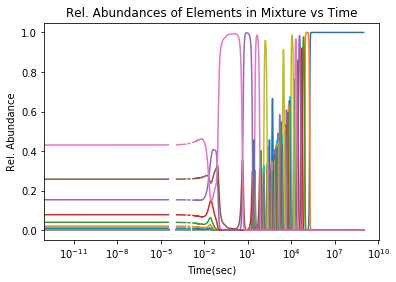

This is for element:  87


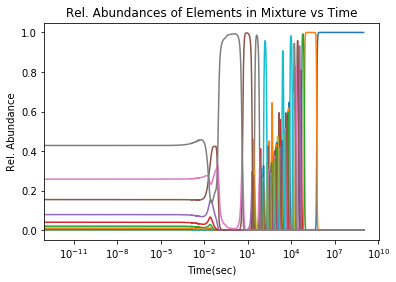

This is for element:  88


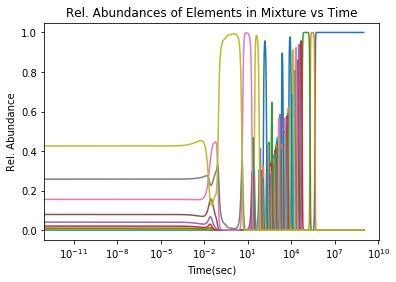

This is for element:  89


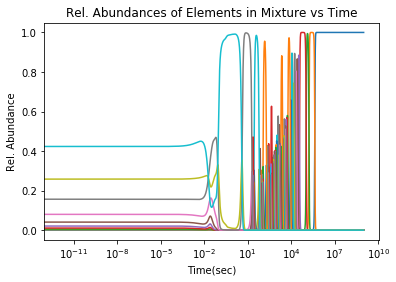

This is for element:  90


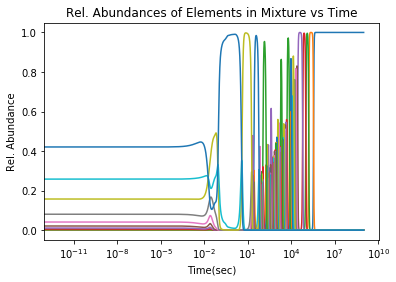

This is for element:  91


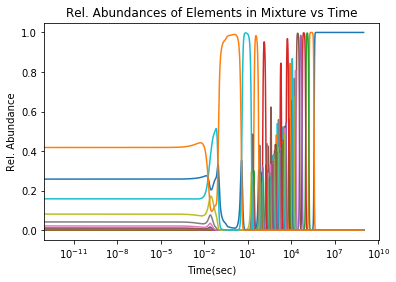

This is for element:  92


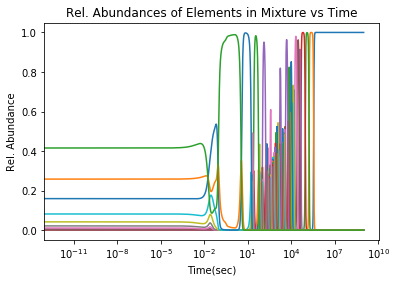

This is for element:  93


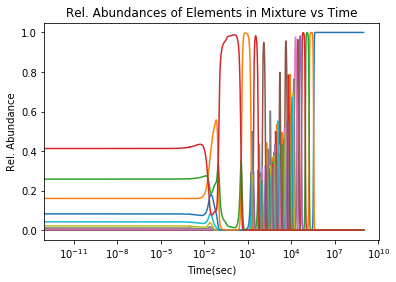

This is for element:  94


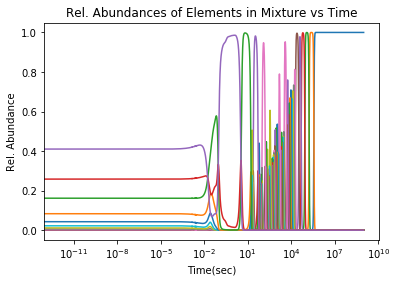

This is for element:  95


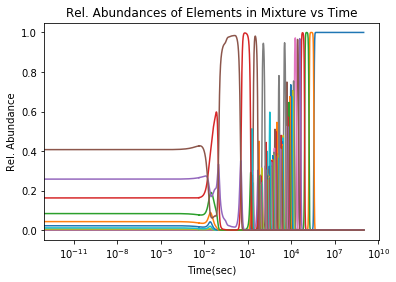

This is for element:  96


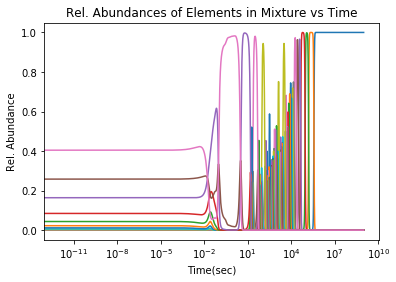

This is for element:  97


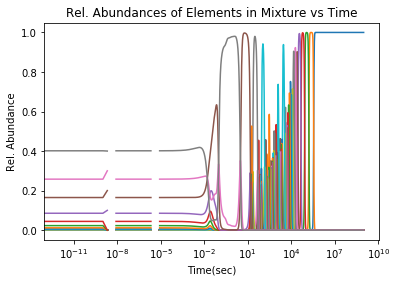

This is for element:  98


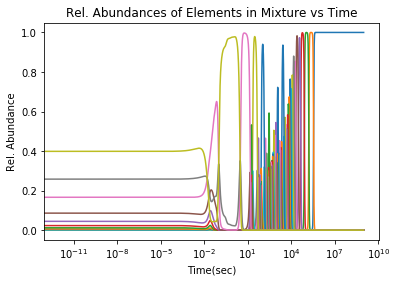

This is for element:  99


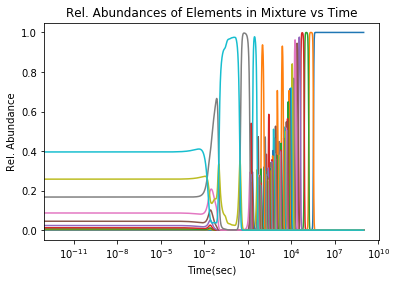

This is for element:  100


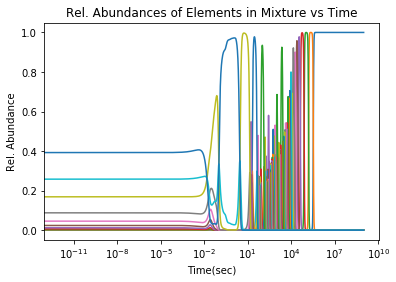

This is for element:  101


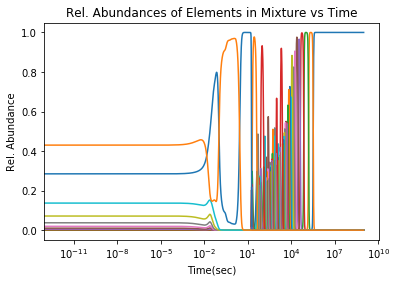

This is for element:  102


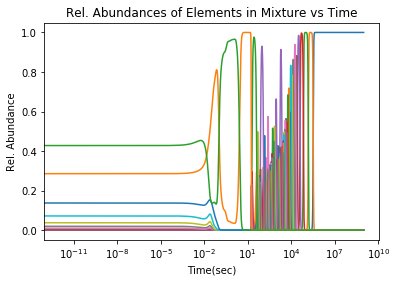

This is for element:  103


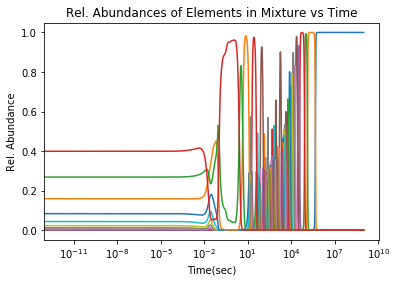

In [26]:
#Graphing abundances from total and big dataset
element_num = 1
for Y in YI_all_adjusted:
    print('This is for element: ',element_num)
    Ytot = np.sum(Y,1)   
    #Time
    for i in range(len(Y[0])):
        plt.semilogx(np.array(time),(Y[:,i])/Ytot)
        plt.xlabel("Time(sec)")
        plt.ylabel("Rel. Abundance")
        plt.title("Rel. Abundances of Elements in Mixture vs Time")
        #plt.xlim([3600,1.21e+6])
    element_num+=1
    plt.show()

This is for element:  1


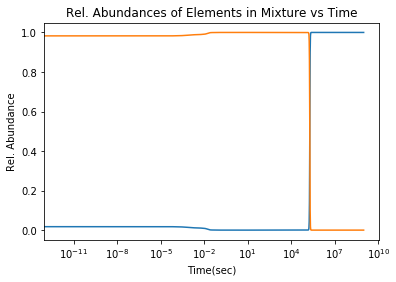

This is for element:  2


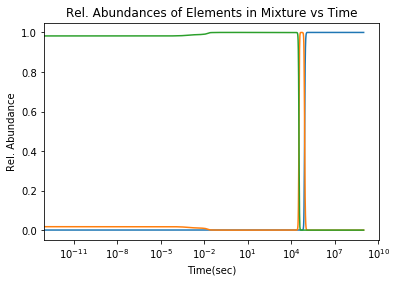

This is for element:  3


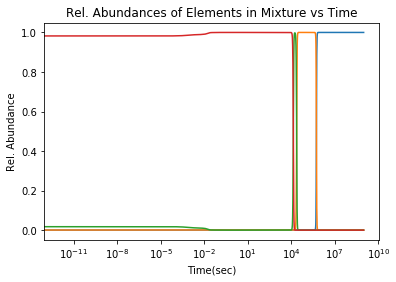

This is for element:  4


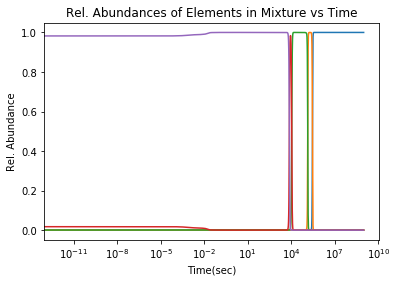

This is for element:  5


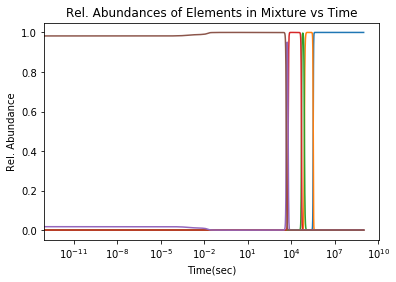

This is for element:  6


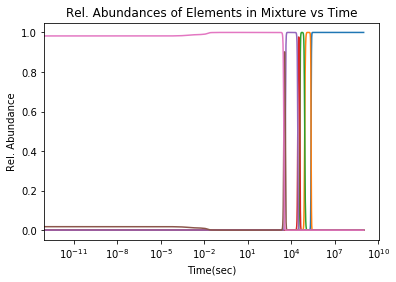

This is for element:  7


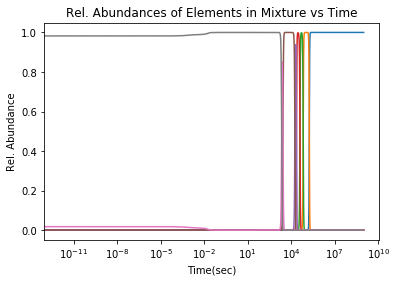

This is for element:  8


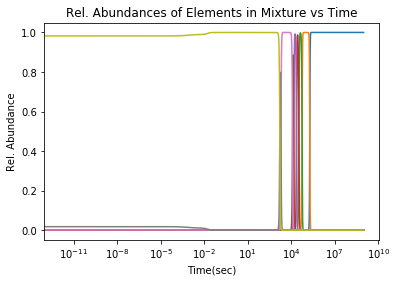

This is for element:  9


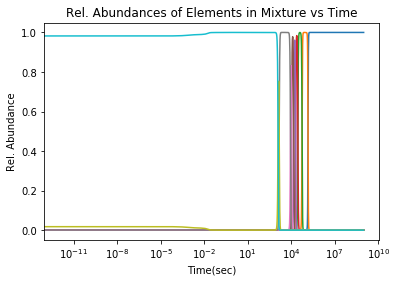

This is for element:  10


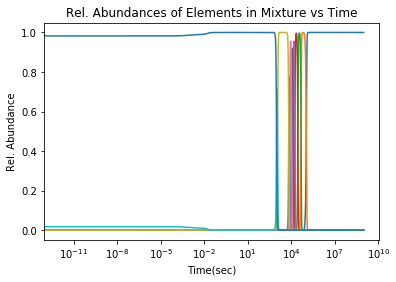

This is for element:  11


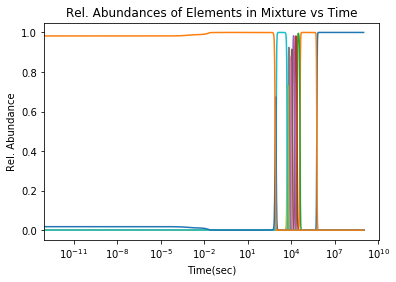

This is for element:  12


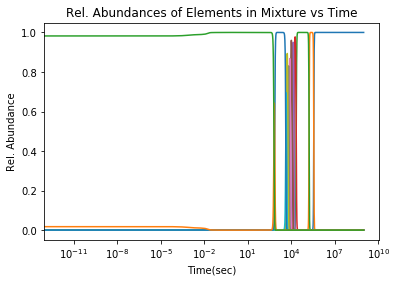

This is for element:  13


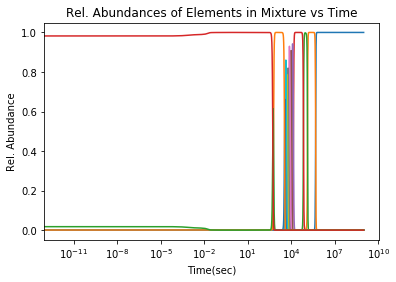

This is for element:  14


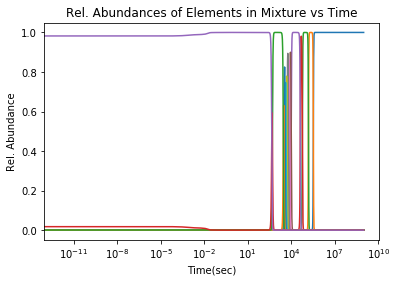

This is for element:  15


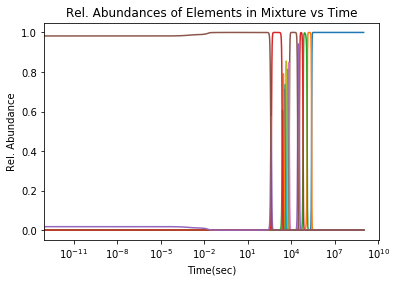

This is for element:  16


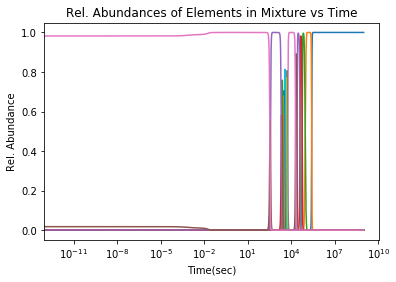

This is for element:  17


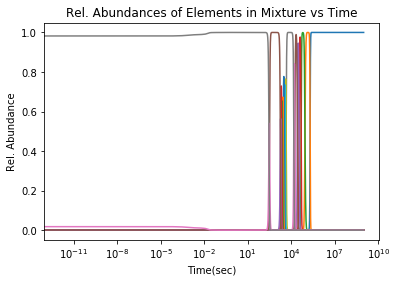

This is for element:  18


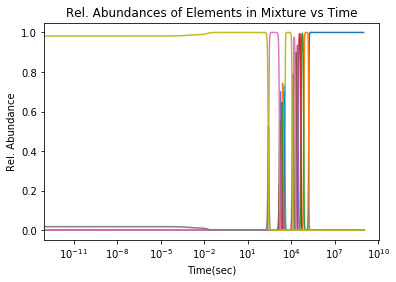

This is for element:  19


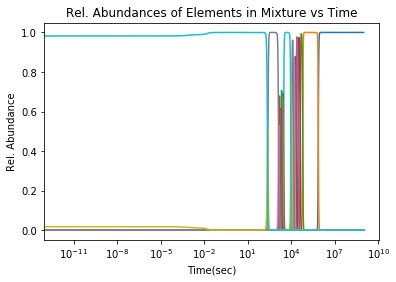

This is for element:  20


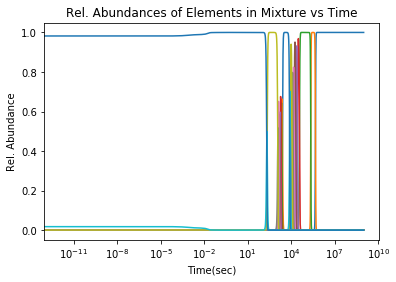

This is for element:  21


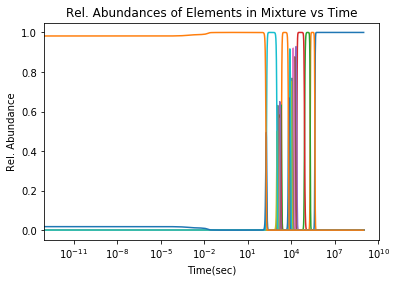

This is for element:  22


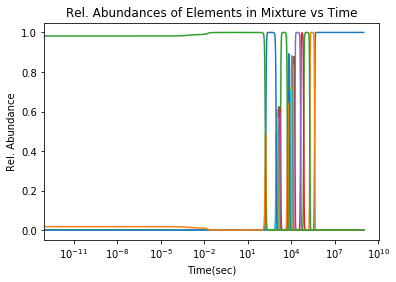

This is for element:  23


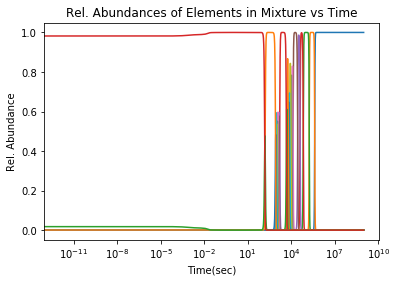

This is for element:  24


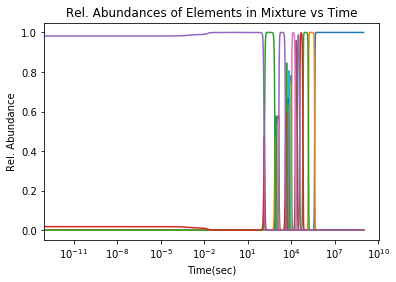

This is for element:  25


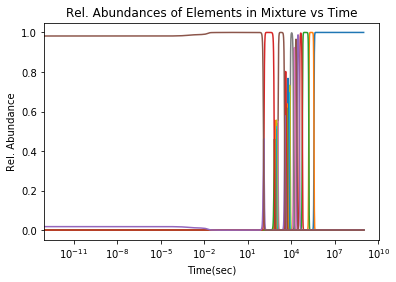

This is for element:  26


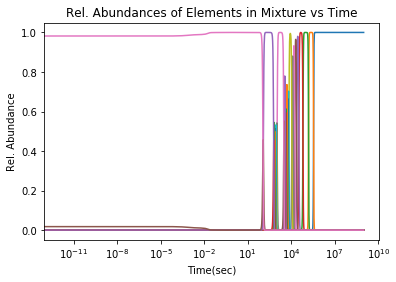

This is for element:  27


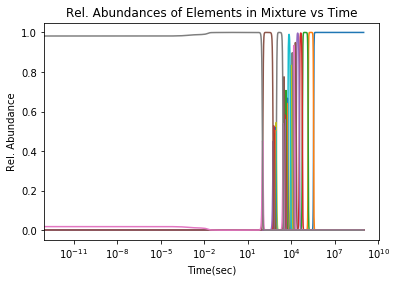

In [4]:
with open("calculation28.txt", "rb") as fp:   # Unpickling
      YI = pickle.load(fp)
        
element_num = 1
for Y in YI:
    print('This is for element: ',element_num)
    Ytot = np.sum(Y,1)   
    #Time
    for i in range(len(Y[0])):
        plt.semilogx(np.array(time),(Y[:,i])/Ytot)
        plt.xlabel("Time(sec)")
        plt.ylabel("Rel. Abundance")
        plt.title("Rel. Abundances of Elements in Mixture vs Time")
        #plt.xlim([3600,1.21e+6])
    element_num+=1
    plt.show()